# Исследование надёжности заёмщиков

**Цель проекта** — выяснить, влияет ли количество детей клиента банка, семейное положение, уровень дохода и цель получения кредита на своевременное погашение кредита.

Результаты исследования будут использованы для создания модели кредитного скоринга — специализированной системы, которая определяет способность потенциальных заёмщиков погасить кредит, предоставленный банком.

**Описание данных**

- `children` — количество детей в семье;

- `days_employed` — общий трудовой стаж в днях;

- `dob_years` — возраст клиента в годах;

- `education` — уровень образования клиента;

- `education_id` — идентификатор уровня образования;

- `family_status` — семейное положение;

- `family_status_id` — идентификатор семейного положения;

- `gender` — пол клиента;

- `income_type` — тип занятости;

- `debt` — имел ли задолженность по возврату кредитов;

- `total_income` — ежемесячный доход;

- `purpose` — цель получения кредита.


**План работы**

1. Загрузка данных и изучение общей информации.
- Загрузка данных о клиентах банка из csv-файла в переменную.
- Вывод первых строк набора данных.
- Изучение общей информации о датафрейме.

2. Предобработка данных.
- Обработка пропущенных значений.
- Обработка аномальных значений.
- Преобразование данных в нужный тип.
- Обработка явных и неявных дубликатов.
- Категоризация данных.

3. Исследовательский анализ данных.
- Изучение зависимости между количеством детей и возвратом кредита в срок.
- Изучение зависимости между семейным положением и возвратом кредита в срок.
- Изучение зависимости между уровнем дохода и возвратом кредита в срок.
- Изучение зависимости между целью кредита и возвратом кредита в срок.

4. Написание общих выводов по результатам исследования.

## Загрузка данных и изучение общей информации

Импортируем необходимые библиотеки и модули.

In [7]:
import pandas as pd
# импорт библиотеки pandas
import seaborn as sns 
# импорт библиотеки seaborn
from matplotlib import pyplot as plt 
# импорт модуля pyplot из библиотеки matplotlib
%matplotlib inline

### Считывание файла с данными и сохранение в датафрейм

Считаем данные из файла в датафрейм и сохраним в переменную `data`.

In [10]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
# чтение данных из csv-файла в датафрейм и сохранение в переменную ‘data’

### Вывод первых строк набора данных

Выведем первые 5 строк датафрейма `data` на экран.

In [13]:
data.head()
# отображение первых 5 строк датафрейма ‘data’

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### Изучение общей информации о датафрейме

Выведем основную информацию о датафрейме `data`.

In [16]:
data.info()
# вывод информации о датафрейме ‘data’

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице `data` 21 тыс. 525 строк и 12 столбцов. Пять столбцов содержат целые числа (`'children'`, `'dob_years'`, `'education_id'`, `'family_status_id'`, `'debt'`), пять столбцов — строки (`'education'`, `'family_status'`, `'gender'`, `'income_type'`, `'purpose'`) и два столбца — вещественные числа (`'days_employed'`, `'total_income'`).

## Предобработка данных

### Обработка пропусков

Выведем количество пропущенных значений для каждого столбца датафрейма `data`.

In [21]:
data.isna().sum().sort_values(ascending=False)
# подсчёт количества отсутствующих значений в каждом столбце датафрейма ‘data’
# сортировка значений по убыванию

days_employed       2174
total_income        2174
children               0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
purpose                0
dtype: int64

В столбцах `'days_employed'` и `'total_income'` существует 2 тыс. 174 пропущенных значения.

Возможные причины наличия пропущенных значений в данных о трудовом стаже клиентов банка:
- ошибки при вводе данных;
- технические проблемы;
- некоторые клиенты банка считают свой трудовой стаж конфиденциальной информацией и не хотят её раскрывать;
- клиенты работают неофициально и не указывают информацию о трудовом стаже;
- клиенты часто меняют работу и не имеют стабильного трудового стажа.

Возможные причины появления пропусков в данных о доходах клиентов банка:
- ошибки ввода данных;
- технические проблемы;
- нежелание клиентов банка раскрывать информацию о своих доходах;
- клиенты имеют доходы из разных источников, которые не всегда легко отследить;
- доходы могут быть получены в виде наличных, которые не учитываются в банковских системах;
- временные промежутки между доходами слишком короткие, что делает их трудноизмеримыми.

Доход в большей степени определяется типом занятости, поэтому заполним пропущенные значения в столбце `'total_income'` медианными значениями по каждому типу из столбца `'income_type'`.

In [25]:
for i in data['income_type'].unique(): 
    data.loc[(data['income_type'] == i) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == i), 'total_income'].median()
# на каждом шаге цикла выбираем строки,
# в которых в ‘income_type’ содержится текущий тип занятости (i) и есть пропуски в ‘total_income’
# и записываем в них медианное значение ‘total_income’ среди строк с текущим типом занятости (i)

Заполним пропуски в столбце `'days_employed'` медианными значениями по каждому типу занятости `'income_type'`.

In [27]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == i), 'days_employed'].median()
# на каждом шаге цикла выбираем строки,
# в которых в ‘income_type’ текущий тип занятости (i) и есть пропуски в ‘days_employed’
# и записываем в них медианное значение ‘days_employed’ среди строк с текущим типом занятости (i)

Убедимся, что все пропуски заполнены. Выведем количество пропущенных значений для каждого столбца датафрейма `data`.

In [29]:
data.isna().sum()
# подсчёт количества отсутствующих значений в каждом столбце датафрейма ‘data’

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

В столбцах `total_income` (ежемесячный доход) и `days_employed` (количество дней трудового стажа) пропуски заполнены медианными значениями.

Доход и трудовой стаж в днях являются количественными значениями. Пропуски в таких колонках обычно заполняют средним арифметическим или медианой. В данном случае лучше использовать медиану, так как в данных могут быть выдающиеся значения, которые сместят среднее. Заполнение пропусков нулём или максимальным значением нецелесообразно, потому что такие значения нельзя назвать характерными.

### Обработка аномальных значений

В данных встречается отрицательное количество дней трудового стажа в столбце `'days_employed'`. Заменим все отрицательные значения положительными.

In [33]:
data['days_employed'] = data['days_employed'].abs()
# замена значений в столбце ‘days_employed’ датафрейма ‘data’ на абсолютные

Для каждого типа занятости выведем медианное значение трудового стажа `'days_employed'` в днях.

In [35]:
round(data.groupby('income_type')['days_employed'].agg('median').sort_values(ascending=False), 1).to_frame()
# группировка данных по столбцу ‘income_type’ и вычисление медианы значений в столбце ‘days_employed’
# сортировка значений по убыванию
# округление результатов до 1-го знака после запятой

,days_employed
income_type,
безработный,366413.7
пенсионер,365213.3
в декрете,3296.8
госслужащий,2689.4
сотрудник,1574.2
компаньон,1547.4
студент,578.8
предприниматель,520.8


У безработных и пенсионеров наблюдаются аномально высокие медианные значения трудового стажа. Исправить эти значения сложно, поэтому оставим их без изменений.

Выведем уникальные значения столбца `'children'`.

In [38]:
data['children'].unique()
# получение уникальных значений столбца ‘children’ датафрейма ‘data’

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `'children'` содержатся два аномальных значения. Удалим строки из датафрейма `data`, в которых присутствуют эти аномальные значения.

In [40]:
data = data.query('children != -1 and children != 20')
# запись в переменную data строк из датафрейма ‘data’, где значения столбца ‘children’ не равны -1 и 20

Ещё раз выведем уникальные значенийя столбца `'children'`, чтобы убедиться, что аномалии удалены.

In [42]:
data['children'].unique()
# получение уникальных значений столбца ‘children’ датафрейма ‘data’

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Изменение типов данных

Заменим вещественный тип данных в столбце `'total_income'` на целочисленный.

In [45]:
data['total_income'] = data['total_income'].astype(int)
# преобразование значений столбца ‘total_income’ датафрейма ‘data’ в целочисленный тип

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `'education'`. В этом столбце одни и те же значения записаны по-разному: с использованием заглавных и строчных букв. Приведём их к нижнему регистру.

In [48]:
data['education'] = data['education'].str.lower()
# приведение значений столбца ‘education’ датафрейма ‘data’ к нижнему регистру

Выведем на экран количество строк-дубликатов в данных.

In [50]:
data.duplicated().sum()
# подсчёт количества дубликатов в датафрейме ‘data’

71

Обнаружен 71 дубликат. Удалим повторяющиеся строки из датафрейма `data`.

In [52]:
data = data.drop_duplicates()
# удаление дубликатов из датафрейма ‘data’
data.duplicated().sum()
# подсчёт количества дубликатов в датафрейме ‘data’

0

### Категоризация данных

Создадим функцию, которая будет назначать определённую категорию в зависимости от дохода клиента.

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [55]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass
# создание функции ‘categorize_income’

На основании данных из столбца `'total_income'` и выделенных диапазонов сформируем новый столбец `'total_income_category'` с категориями.

In [57]:
data['total_income_category'] = data['total_income'].apply(categorize_income)
# создание нового столбца ‘total_income_category’ в датафрейме ‘data’ 
# с преобразованными значениями столбца ‘total_income’ в соответствующие категории с помощью функции ‘categorize_income’
data['total_income_category'].head()
# отображение первых 5 строк столбца ‘total_income_category’ датафрейма ‘data’

0    B
1    C
2    C
3    B
4    C
Name: total_income_category, dtype: object

Выведем уникальные цели взятия кредита из столбца `'purpose'`.

In [59]:
data['purpose'].unique()
# получение уникальных значений столбца ‘purpose’ датафрейма ‘data’

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `'purpose_category'`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [61]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'
# создание функции ‘categorize_purpose’

In [62]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
# создание нового столбца ‘purpose_category’ в датафрейме ‘data’
# с преобразованными значениями столбца ‘purpose’ в соответствующие категории с помощью функции ‘categorize_purpose’
data['purpose_category'].head()
# отображение первых 5 строк столбца ‘purpose_category’ датафрейма ‘data’

0    операции с недвижимостью
1      операции с автомобилем
2    операции с недвижимостью
3       получение образования
4          проведение свадьбы
Name: purpose_category, dtype: object

## Исследование данных

### Зависимость между количеством детей и возвратом кредита в срок

Построим гистограмму, чтобы посмотреть соотношение клиентов банка по наличию задолженности по возврату кредитов. Цифрой `'0'` обозначены те, кто не имеет задолженность, `'1'` — те, кто имеет задолженность.

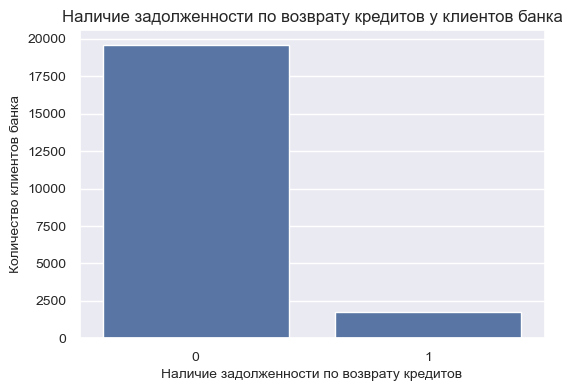

In [66]:
sns.set_style('whitegrid') 
# установка стиля отображения графика
sns.set(rc={'figure.figsize':(6, 4)}) 
# установка размера графика
def graph(variable): 
# определение функции ‘graph’
    graph = sns.countplot(x=variable, data=data, color='b', 
                          order=data[variable].value_counts().index)
    return graph
graph('debt') 
# создание графика, который показывает количество наблюдений 
# в зависимости от наличия задолженности
plt.xticks(fontsize=10)
# установка размера шрифта меток горизонтальной оси
plt.yticks(fontsize=10)
# установка размера шрифта меток вертикальной оси
plt.title('Наличие задолженности по возврату кредитов у клиентов банка', 
          fontsize=12) 
# добавление заголовка к графику
plt.xlabel('Наличие задолженности по возврату кредитов', fontsize=10) 
# добавление подписи к горизонтальной оси графика
plt.ylabel('Количество клиентов банка', fontsize=10)
# добавление подписи к вертикальной оси графика
plt.show()
# отображение графика

Многие клиенты не имеют задолженность по возврату кредитов.

Определим количество заёмщиков с задолженностью по возврату кредитов и без неё.

In [69]:
def number_and_proportion_of_variable_values(variable): 
# определение функции ‘number_and_proportion_of_variable_values’
    pivot_table_1 = data[variable].value_counts()
    pivot_table_2 = data.groupby(variable).size() / len(data) * 100
    return pivot_table_1, pivot_table_2
number_and_proportion_of_variable_values('debt') 
# рассчёт количества наблюдений
# и процентного соотношения для каждой группы значений переменной ‘debt’

(debt
 0    19599
 1     1732
 Name: count, dtype: int64,
 debt
 0    91.880362
 1     8.119638
 dtype: float64)

19.6 тыс. человек не имеют задолженность по возврату кредитов, что составляет 92% от общего количества кредитополучателей.

1.7 тыс. человек имеют задолженность, что составляет 8% от всех заёмщиков.

Построим гистограмму, чтобы посмотреть соотношение клиентов банка по количеству детей в семье.

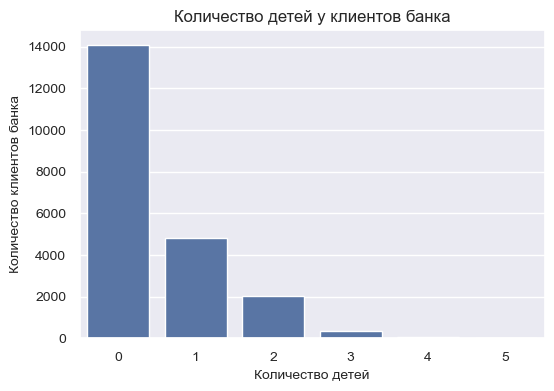

In [72]:
graph('children') 
# создание графика, который показывает количество наблюдений
# в зависимости от количества детей в семье
plt.xticks(fontsize=10)
# установка размера шрифта меток горизонтальной оси
plt.yticks(fontsize=10)
# установка размера шрифта меток вертикальной оси
plt.title('Количество детей у клиентов банка', fontsize=12) 
# добавление заголовка к графику
plt.xlabel('Количество детей', fontsize=10) 
# добавление подписи к горизонтальной оси графика
plt.ylabel('Количество клиентов банка', fontsize=10) 
# добавление подписи к вертикальной оси графика
plt.show()
# отображение графика

Большая часть клиентов банка не имеет детей. 

Среди тех, у кого есть дети, наиболее распространённым количеством является один ребёнок в семье.

Установим число заёмщиков с определённым количеством детей в семье.

In [75]:
number_and_proportion_of_variable_values('children') 
# рассчёт количества наблюдений
# и процентного соотношения для каждой группы значений переменной ‘children’

(children
 0    14091
 1     4808
 2     2052
 3      330
 4       41
 5        9
 Name: count, dtype: int64,
 children
 0    66.058788
 1    22.539965
 2     9.619802
 3     1.547044
 4     0.192209
 5     0.042192
 dtype: float64)

У 14.1 тыс. человек нет детей, что составляет 66% от всех клиентов банка.

4.8 тыс. человек имеют 1-го ребёнка, что составляет 23% от общего количества клиентов.

2.1 тыс. человек имеют 2-х детей, что составляет 10% клиентов.

Лишь у 9-ти человек — 5 детей в семье.

Определим долю клиентов банка с задолженностью по возврату кредитов и без неё, с детьми и без них.

In [78]:
def function(number_debt_children): 
# определение функции ‘function’
    total_number = data['debt'].count() 
    # рассчёт общего количества клиентов банка
    share_debt_children = number_debt_children / total_number 
    # рассчёт доли клиентов с задолженностью/без неё и с детьми/без них
    share_debt_children = round(share_debt_children, 2) 
    # округление числа до двух знаков после запятой
    share_debt_children = f'{share_debt_children * 100}%' 
    # преобразование вещественного числа в процент
    return total_number, number_debt_children, share_debt_children

print('Количество и доля клиентов банка без задолженности по кредитам и без детей:', 
      function((data.loc[(data['debt'] == 0) 
                         & (data['children'] == 0)])['debt'].count())) 
      # рассчёт количества и доли клиентов, не имеющих задолженность и детей
print('Количество и доля клиентов банка без задолженности по кредитам и с детьми:', 
      function((data.loc[(data['debt'] == 0) 
                         & (data['children'] != 0)])['debt'].count())) 
      # рассчёт количества и доли клиентов, не имеющих задолженность, 
      # но имеющих детей
print('Количество и доля клиентов банка с задолженностью по кредитам и без детей:', 
      function((data.loc[(data['debt'] == 1) 
                         & (data['children'] == 0)])['debt'].count())) 
      # рассчёт количества и доли клиентов, имеющих задолженность
      # и не имеющих детей
print('Количество и доля клиентов банка с задолженностью по кредитам и с детьми:', 
      function((data.loc[(data['debt'] == 1) 
                         & (data['children'] != 0)])['debt'].count())) 
      # рассчёт количества и доли клиентов, имеющих задолженность и детей

Количество и доля клиентов банка без задолженности по кредитам и без детей: (21331, 13028, '61.0%')
Количество и доля клиентов банка без задолженности по кредитам и с детьми: (21331, 6571, '31.0%')
Количество и доля клиентов банка с задолженностью по кредитам и без детей: (21331, 1063, '5.0%')
Количество и доля клиентов банка с задолженностью по кредитам и с детьми: (21331, 669, '3.0%')


Более половины клиентов банка (61%) не имеют задолженность по возврату кредитов и являются бездетными.

Выборки с тремя, четырьмя, и пятью детьми нерепрезентативны, так как имеют слишком мало значений, — в сумме они составляют менее 2%. Поэтому проведём категоризацию.

Создадим функцию, которая на основании данных из столбца `children` сформирует новый столбец `children _category`, в который войдут следующие категории:

- 0 детей — `'нет детей'`;
- 1-2 ребёнка — `'мало детей'`;
- 3-5 детей — `'много детей'`.

In [81]:
def categorize_children(children):
    try:
        if children == 0:
            return 'нет детей'
        elif 1 <= children <= 2:
            return 'мало детей'
        elif 3 <= children <= 5:
            return 'много детей'
    except:
        pass
# создание функции ‘categorize_children’

In [82]:
data['children_category'] = data['children'].apply(categorize_children) 
# применение функции ‘categorize_children’ 
# к каждому значению столбца ‘children’
# создание нового столбца в датафрейме ‘data’ 
# на основе значения существующего столбца ‘children’
data['children_category'].head()
# отображение первых 5 строк столбца ‘children_category’ датафрейма ‘data’

0     мало детей
1     мало детей
2      нет детей
3    много детей
4      нет детей
Name: children_category, dtype: object

Рассчитаем долю заёмщиков с задолженностью по возврату кредитов для определённого количества детей в семье.

In [84]:
def share_of_debtors(variable): 
# определение функции ‘share_of_debtors’
    crosstab = data.pivot_table(index = variable, values = 'debt', 
                                aggfunc=['count', 'sum', 'mean'])
    crosstab.columns = ['total_number_of_clients', 'number_of_debtors', 
                        'share_of_debtors']
    crosstab['share_of_debtors'] = crosstab['share_of_debtors'].map('{:.1%}'.format)
    crosstab = crosstab.sort_values(by='share_of_debtors', ascending=False)
    return crosstab
share_of_debtors('children_category')
# создание кросс-таблицы, в которой для каждого количества детей в семье 
# рассчитывается общее количество заёмщиков, 
# количество и доля заёмщиков с задолженностью по возврату кредитов

,total_number_of_clients,number_of_debtors,share_of_debtors
children_category,,,
мало детей,6860,638,9.3%
много детей,380,31,8.2%
нет детей,14091,1063,7.5%


Наибольшую долю должников по кредитам составляют те, у кого мало детей (один или два ребёнка). Те, у кого нет детей, — наименьшую долю. В многодетных семьях (три ребёнка и более) доля должников меньше, чем в малодетных семьях.

**Вывод:** 

Большинство бездетных людей не имеют задолженность по возврату кредитов.

Наличие детей повышает риск невозврата кредита в срок. Появление ребёнка может потребовать от семьи дополнительных расходов, что приводит к уменьшению её сбережений.

С увеличением количества детей вероятность невозврата кредита в срок может уменьшаться. Возможно, это связано с тем, что семьи, в состав которых входит три и более ребёнка, часто получают дополнительные выплаты и льготы от государства, что помогает им справляться с финансовыми трудностями.

### Зависимость между семейным положением и возвратом кредита в срок

Посмотрим, какие виды семейного положения существуют в датафрейме.

In [89]:
data['family_status'].unique() 
# просмотр уникальных значений переменной ‘family_status’

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Построим гистограмму, чтобы посмотреть соотношение получателей кредита по семейному положению.

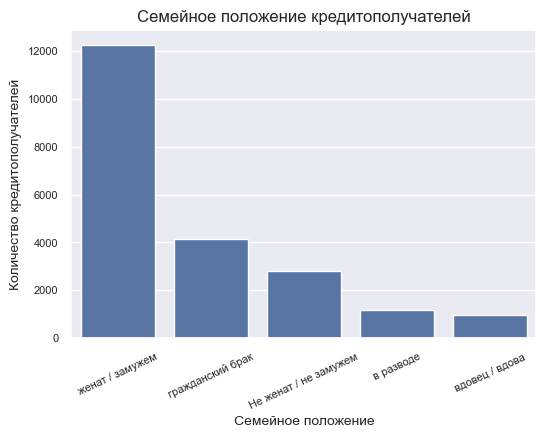

In [91]:
graph('family_status') 
# создание графика, который показывает количество наблюдений 
# в зависимости от семейного положения
plt.xticks(rotation=25)
# установка расположения меток горизонтальной оси
plt.xticks(fontsize=8)
# установка размера шрифта меток горизонтальной оси
plt.yticks(fontsize=8)
# установка размера шрифта меток вертикальной оси
plt.title('Семейное положение кредитополучателей', fontsize=12) 
# добавление заголовка к графику
plt.xlabel('Семейное положение', fontsize=10) 
# добавление подписи к горизонтальной оси графика
plt.ylabel('Количество кредитополучателей', fontsize=10) 
# добавление подписи к вертикальной оси графика
plt.show()
# отображение графика

Большую часть кредитополучателей составляют женатые или замужние. 

К следующим по численности группам относятся клиенты банка, состоящие в гражданском браке, а также неженатые или незамужние.

Всех меньше среди получателей кредита разведённых, вдовцов или вдов.

Рассчитаем количество клиентов банка с определённым семейным положением.

In [94]:
number_and_proportion_of_variable_values('family_status') 
# рассчёт количества наблюдений и процентного соотношения 
# для каждой группы значений переменной ‘family_status’

(family_status
 женат / замужем          12261
 гражданский брак          4134
 Не женат / не замужем     2796
 в разводе                 1189
 вдовец / вдова             951
 Name: count, dtype: int64,
 family_status
 Не женат / не замужем    13.107684
 в разводе                 5.574047
 вдовец / вдова            4.458300
 гражданский брак         19.380245
 женат / замужем          57.479724
 dtype: float64)

12.3 тыс. человек состоят в зарегистрированном браке, что составляет 58% от общего числа клиентов банка.

4.1 тыс. человек состоят в незарегистрированном браке, что составляет 19% от всех клиентов.

2.8 тыс. человек никогда не состояли в браке, что составляет 13% от всех клиентов.

1.2 тыс. человек разведены, что составляет 6% от всех клиентов банка.

951 человек являются вдовцами или вдовами, что составляет 5% от всех клиентов.

Определим долю заёмщиков с задолженностью по возврату кредитов для определённого вида семейного положения.

In [97]:
share_of_debtors('family_status') 
# создание кросс-таблицы, в которой для каждого вида семейного положения 
# рассчитывается общее количество заёмщиков, 
# количество и доля заёмщиков с задолженностью по возврату кредитов

,total_number_of_clients,number_of_debtors,share_of_debtors
family_status,,,
Не женат / не замужем,2796,273,9.8%
гражданский брак,4134,385,9.3%
женат / замужем,12261,927,7.6%
в разводе,1189,84,7.1%
вдовец / вдова,951,63,6.6%


Большую долю должников по кредитам составляют неженатые мужчины и незамужние женщины, а также те, кто состоит в гражданском браке. Меньшую долю — те, кто когда-либо состоял или в настоящий момент состоит в зарегистрированном браке.

**Вывод:** 

Люди, не состоящие в браке, и гражданские супруги больше рискуют стать должниками по кредиту. Причиной этого может служить самостоятельное управление финансами, отсутствие общих денежных накоплений.

Те, кто состоит в официальном браке, в меньшей степени подвержены риску возникновения задолженности по возврату кредита. Зарегистрированный брак может способствовать укреплению финансовой устойчивости семьи и улучшению её благосостояния. При оформлении кредита на человека, состоящего в законном браке, второй супруг может стать созаёмщиком и нести ответственность за погашение займа. В случае развода с кредитом ничего не произойдёт, так как имущество и обязательства супругов делятся по семейному кодексу или брачному договору. При смерти одного из супругов второй может получить наследство.

### Зависимость между уровнем дохода и возвратом кредита в срок

Получим среднее значение ежемесячного дохода клиентов банка.

In [102]:
round(data['total_income'].mean(), 1)
# рассчёт среднего значения дохода клиентов банка

165342.7

В среднем ежемесячный доход клиентов банка составляет 165.3 тыс.

Найдём медиану ежемесячного дохода клиентов банка.

In [105]:
data['total_income'].median() 
# рассчёт медианы дохода клиентов

142594.0

Медиана ежемесячного дохода клиентов банка равна 142,6 тыс., что меньше среднего значения. Возможно, это связано с тем, что распределение доходов имеет асимметричный характер. Среднее значение может быть смещено вверх из-за наличия нескольких "экстремальных" значений. Медиана является более устойчивой мерой центральной тенденции.

Рассчитаем среднее значение ежемесячного дохода у заёмщиков с задолженностью по возврату кредитов и без неё.

In [108]:
data.pivot_table(columns='debt', values='total_income', 
                 aggfunc=['count', 'sum', 'mean']) 
# cоздание кросс-таблицы, показывающей средний ежемесячный доход, 
# который приходится на заёмщиков 
# с задолженностью по возврату кредитов и без неё

count               sum                      mean               
debt              0     1           0          1              0              1
total_income  19599  1732  3247810363  279115747  165713.065105  161152.278868

Среднее значение ежемесячного дохода у заёмщиков, не имеющих задолженность по возврату кредитов (165,7 тыс.), выше, чем у тех, кто имеет задолженность (161,2 тыс.).

Доходы кредитополучателей разделены на разные категории в зависимости от их размера:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Построим гистограмму, чтобы посмотреть соотношение клиентов банка по уровню дохода.

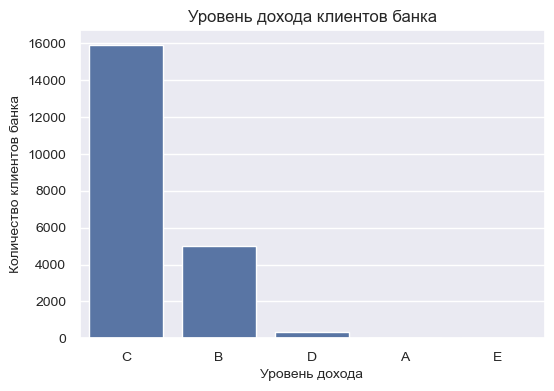

In [112]:
graph('total_income_category') 
# создание графика, который показывает количество наблюдений 
# в зависимости от уровня дохода
plt.xticks(fontsize=10)
# установка размера шрифта меток горизонтальной оси
plt.yticks(fontsize=10)
# установка размера шрифта меток вертикальной оси
plt.title('Уровень дохода клиентов банка', fontsize=12) 
# добавление заголовка к графику
plt.xlabel('Уровень дохода', fontsize=10) 
# добавление подписи к горизонтальной оси графика
plt.ylabel('Количество клиентов банка', fontsize=10) 
# добавление подписи к вертикальной оси графика
plt.show()
# отображение графика

Наибольшее число клиентов банка имеет средний уровень дохода — от 50 тыс. до 200 тыс.

Ко второй по численности группе относятся клиенты банка с уровнем дохода выше среднего — от 200 тыс. до 1 млн.

Существует небольшое количество клиентов с высоким уровнем дохода (от 1 млн. и выше), уровнем дохода ниже среднего (от 30 тыс. до 50 тыс.) и низким уровнем дохода (от 0 до 30 тыс.).

Установим число клиентов банка с определённым уровнем дохода.

In [115]:
number_and_proportion_of_variable_values('total_income_category') 
# рассчёт количества наблюдений и процентного соотношения 
# для каждой группы значений переменной ‘total_income_category’

(total_income_category
 C    15921
 B     5014
 D      349
 A       25
 E       22
 Name: count, dtype: int64,
 total_income_category
 A     0.117200
 B    23.505696
 C    74.637851
 D     1.636116
 E     0.103136
 dtype: float64)

У 16 тыс. клиентов банка (75%) средний уровень дохода.

У 5 тыс. клиентов банка (24%) уровень дохода выше среднего.

У 349 клиентов банка (2%) уровень дохода ниже среднего.

У 25 клиентов банка высокий уровень дохода.

У 22 клиентов банка низкий уровень дохода.

Выборки являются крайне несбалансированными. Самая маленькая категория в 728 раз меньше самой большой. Было бы лучше, если бы они были примерно одинаковыми.

Рассчитаем долю заёмщиков с задолженностью по возврату кредитов для определённого уровня дохода.

In [118]:
share_of_debtors('total_income_category') 
# создание кросс-таблицы, в которой для каждого уровня дохода 
# рассчитывается общее количество заёмщиков, 
# количество и доля заёмщиков с задолженностью по возврату кредитов

,total_number_of_clients,number_of_debtors,share_of_debtors
total_income_category,,,
E,22,2,9.1%
C,15921,1353,8.5%
A,25,2,8.0%
B,5014,354,7.1%
D,349,21,6.0%


Если не учитывать немногочисленные по составу группы (2 должника с низким уровнем дохода и 2 — с высоким, 21 должник с уровнем дохода ниже среднего), то большую долю должников по кредитам составляют заёмщики со средним уровнем дохода (от 50 тыс. до 200 тыс.) и меньшую долю — заёмщики с уровнем дохода выше среднего (от 200 тыс. до 1 млн.).

**Вывод:** 

С более низким уровнем дохода увеличивается вероятность того, что кредит не будет погашен в установленные сроки. Людям с низким доходом может не хватать денег на своевременную оплату платежей по кредиту. Причиной этого может служить отсутствие стабильного источника дохода, непредвиденные расходы, неумение правильно планировать свой бюджет.

Чем выше доход заёмщика, тем больше вероятность того, что он сможет своевременно погасить кредит. Это связано с тем, что у заёмщика с высоким доходом меньше финансовых трудностей и больше возможностей для погашения кредита.

### Зависимость между целью кредита и возвратом кредита в срок

Построим гистограмму, чтобы посмотреть соотношение клиентов банка по цели получения кредита.

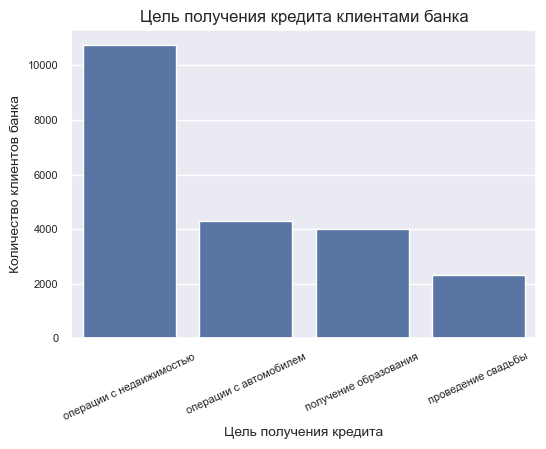

In [123]:
graph('purpose_category') 
# создание графика, который показывает количество наблюдений 
# в зависимости от цели получения кредита
plt.xticks(rotation=25)
# установка расположения меток горизонтальной оси
plt.xticks(fontsize=8)
# установка размера шрифта меток горизонтальной оси
plt.yticks(fontsize=8)
# установка размера шрифта меток вертикальной оси
plt.title('Цель получения кредита клиентами банка', fontsize=12) 
# добавление заголовка к графику
plt.xlabel('Цель получения кредита', fontsize=10) 
# добавление подписи к горизонтальной оси графика
plt.ylabel('Количество клиентов банка', fontsize=10) 
# добавление подписи к вертикальной оси графика
plt.show()
# отображение графика

Самой популярной целью получения кредита является проведение операций с недвижимостью. 

К наименее распространённой цели кредита относится проведение свадьбы.

Выявим количество клиентов банка с определённой целью получения кредита.

In [126]:
number_and_proportion_of_variable_values('purpose_category') 
# рассчёт количества наблюдений и процентного соотношения 
# для каждой группы значений переменной ‘purpose_category’

(purpose_category
 операции с недвижимостью    10751
 операции с автомобилем       4279
 получение образования        3988
 проведение свадьбы           2313
 Name: count, dtype: int64,
 purpose_category
 операции с автомобилем      20.060007
 операции с недвижимостью    50.400825
 получение образования       18.695795
 проведение свадьбы          10.843373
 dtype: float64)

10.8 тыс. человек взяли кредит на операции с недвижимостью, что составляет половину всех клиентов банка.

4.3 тыс. человек оформили кредит на операции с автомобилем — 20% от общего числа клиентов.

Для 4 тыс. человек (19%) целью кредита является получение образования.

2.3 тыс. человек (11%) указали в качестве цели получения кредита проведение свадьбы.

Рассчитаем долю заёмщиков с задолженностью по возврату кредитов для определённой цели получения кредита.

In [129]:
share_of_debtors('purpose_category') 
# создание кросс-таблицы, в которой для каждой цели получения кредита 
# рассчитывается общее колчество заёмщиков, 
# количество и доля заёмщиков с задолженностью по возврату кредитов

,total_number_of_clients,number_of_debtors,share_of_debtors
purpose_category,,,
операции с автомобилем,4279,400,9.3%
получение образования,3988,369,9.3%
проведение свадьбы,2313,183,7.9%
операции с недвижимостью,10751,780,7.3%


На операции с автомобилем и получение образования приходится большая доля должников по возврату кредитов.

Меньшую долю должников составляют те клиенты банка, кто взял кредит на  операции с недвижимостью и проведение свадьбы.

**Вывод:** 

При взятии автокредита вероятность невозврата кредита в установленный срок повышается. Сроки погашения автокредитов, как правило, короткие. Это связано с тем, что автомобиль обычно быстро теряет свою стоимость. Процентные ставки по автокредитам обычно выше, чем по другим кредитам, так как кредиты, связанные с операциями с автомобилем, считаются более рискованными. Возможные аварии и повреждения автомобиля снижают его стоимость и делают менее привлекательным для продажи в случае неплатёжеспособности заёмщика. Рынок автомобилей постоянно меняется, и новые модели могут вытеснить старые, что также оказывает влияние на стоимость машины.

При оформлении кредита на получение образования вероятность несвоевременного погашения кредита также возрастает. Стоимость обучения может значительно возрасти в течение срока кредита, что может сделать его более трудным для выплаты заёмщиком. Заёмщик может не получить работу после окончания учебного заведения, решить не работать в выбранной области, что также может затруднить выплату кредита.

Кредиты на недвижимость обычно имеют более низкие процентные ставки, что может сделать их доступнее для выплаты. Недвижимость является более стабильным активом, который не теряет своей стоимости так быстро, как, например, автомобиль.  Ипотечные кредиты часто имеют длительные сроки погашения, что позволяет заёмщикам выплачивать кредиты более равномерно и без больших переплат. Кредиты на недвижимость также могут быть погашены досрочно без штрафов.

Возможно, кредиты на свадьбу легче выплатить в срок по сравнению с другими видами кредитов, потому что свадьба является важным событием в жизни людей, в связи с чем банки могут быть готовы предложить выгодные условия погашения такого кредита.

## Общий вывод

Нами было проведено исследование надёжности заёмщиков на основе данных от кредитного отдела банка — статистике о платёжеспособности клиентов. При изучении данных было обнаружено, что есть пропущенные и аномальные значения, дубликаты.

Пропущенные значения в данных могли появиться из-за ошибок при внесении информации, технических проблем. Кроме того, данные могли быть не указаны намеренно по разным причинам. Пропуски были заполнены медианным значением. Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. В таком случае медиана — это более объективная информация.

Артефакты или аномалии — значения, которые не отражают действительность и появились по какой-то ошибке. К таким артефактам относятся аномально большие и отрицательные значения. Отрицательные значения были заменены положительными. Аномально большие значения были удалены. Одни и те же значения, но записанные по-разному, также были удалены.

Вещественный тип некоторых данных был заменён на целочисленный. Последний обычно имеет большую ёмкость для хранения чисел и обеспечивает более высокую точность при работе с большими числами.

Часть данных была разделена на категории. Это позволило работать с меньшим объёмом информации, что ускорило процесс анализа и позволило выявить закономерности и тенденции, которые не видны при работе с большим объёмом данных.

В ходе исследования было выявлено, что такие факторы, как количество детей, семейное положение, уровень дохода и цель получения кредита, оказывают влияние на погашение заёмщиком кредита в срок.

- Большинство бездетных людей не имеют задолженность по возврату кредитов. Наличие детей повышает риск невозврата кредита в срок. При этом с увеличением количества детей вероятность невозврата кредита в срок может уменьшаться.

- Люди, не состоящие в браке, и гражданские супруги больше рискуют стать должниками по кредиту. Те, кто когда-либо состоял или в настоящий момент состоит в официальном браке, в меньшей степени подвержены риску возникновения задолженности по возврату кредита.

- С низким уровнем дохода люди могут столкнуться с трудностями в погашении кредита. Чем выше доход заёмщика, тем больше вероятность того, что он сможет своевременно погасить кредит.

- При взятии автокредита и кредита на получение образования риск несвоевременного погашения кредита возрастает. При оформлении кредита на недвижимость или свадьбу меньше вероятность того, что он не будет погашен в установленные сроки.

Таким образом, к более надёжному кредитополучателю можно отнести человека, в прошлом или настоящем состоящего в зарегистрированном браке, бездетного или многодетного, имеющего доход выше среднего, а также оформляющего кредит либо на операции с недвижимостью, либо с целью проведения свадьбы.

Результаты исследования могут быть использованы при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.